# Library

In [ ]:
import pandas as pd
import sys
sys.path.append('../Util')
import BERTopicUtils as btu
from llama_cpp import Llama
from bertopic import BERTopic

# 4 Baseline: merge 121topics and 68 topics with 0.8 similarity

In [3]:
PATH = '../Analyze_files/CombiningAnalysisCompleteDataset'

In [4]:
bt_content_white_nations = BERTopic.load(f"{PATH}/ContentAnalysis/ModelsContent/topic_model_all-MiniLM-L6-v2_150_150n_10dim_white_nation", embedding_model='all-MiniLM-L6-v2')
bt_content = BERTopic.load("Merged_Models", embedding_model='all-MiniLM-L6-v2')

In [9]:
merged_model_content_white_nations = BERTopic.merge_models([bt_content, bt_content_white_nations], min_similarity=.75, embedding_model='all-MiniLM-L6-v2')
merged_model_white_nations_content = BERTopic.merge_models([bt_content_white_nations, bt_content], min_similarity=.75, embedding_model='all-MiniLM-L6-v2')

In [10]:
print(len(merged_model_content_white_nations.get_topic_info()))
print(len(merged_model_white_nations_content.get_topic_info()))

157
155


In [11]:
merged_model_content_white_nations.get_topic_info()

Topic   Count                                               Name  \
0       -1  127409                          -1_vendor_order_nt_market   
1        0   19104                             0_cart_weed_strain_thc   
2        1    6011                       1_deposit_address_ticket_btc   
3        2    6350                          2_key_pgp_account_pgp key   
4        3    3368                        3_order_shipped_ordered_day   
..     ...     ...                                                ...   
152    151     337                 26_antifa_portland_police_violence   
153    152     374                 27_college_school_students_schools   
154    153     197  28_stormfront_stormfront sucks_re stormfront s...   
155    154     192         29_assange_julian_julian assange_wikileaks   
156    155     340             30_coronavirus_virus_pandemic_outbreak   

                                        Representation  Representative_Docs  
0    [vendor, order, nt, market, link, get, like, t...                  NaN  
1    [cart, weed, strain, thc, bud, price, product,...                  NaN  
2    [deposit, address, ticket, btc, wallet, deposi...                  NaN  
3    [key, pgp, account, pgp key, password, message...                  NaN  
4    [order, shipped, ordered, day, week, marked, p...                  NaN  
..                                                 ...                  ...  
152  [antifa, portland, police, violence, protester...                  NaN  
153  [college, school, students, schools, education...                  NaN  
154  [stormfront, stormfront sucks, re stormfront s...                  NaN  
155  [assange, julian, julian assange, wikileaks, u...                  NaN  
156  [coronavirus, virus, pandemic, outbreak, wuhan...                  NaN  

[157 rows x 5 columns]

In [12]:
bt_content.get_topic_info().tail(5)

Topic  Count                                         Name  \
128    127    397   40_withdraw_withdrawal_withdrawl_withdraws   
129    128    281        48_heard_happened_anyone_anyone heard   
130    129    308              49_benzos_benzo_rc_benzo vendor   
131    130    326  50_fraud_fraudsters_fraud vendor_loan fraud   
132    131    178           67_mephedrone_meopcp_mxe_mescaline   

               CustomName                                     Representation  \
128    Bitcoin Withdrawal  [withdraw, withdrawal, withdrawl, withdraws, b...   
129    Something Happened  [heard, happened, anyone, anyone heard, thewiz...   
130        Benzos Vendors  [benzos, benzo, rc, benzo vendor, rc benzos, b...   
131  Fraud and Loan Scams  [fraud, fraudsters, fraud vendor, loan fraud, ...   
132   Chemicals and Drugs  [mephedrone, meopcp, mxe, mescaline, mmc, meph...   

     Representative_Docs  
128                  NaN  
129                  NaN  
130                  NaN  
131                  NaN  
132                  NaN

In [14]:
merged_model_content_white_nations.get_topic_info().tail(25)

Topic  Count                                               Name  \
132    131    178                 67_mephedrone_meopcp_mxe_mescaline   
133    132  10136     0_socialism_lesson_applied socialism_practical   
134    133   2606                     1_trump_democrats_pelosi_biden   
135    134   1802                        2_border_illegal_wall_trump   
136    135   1740                             3_israel_iran_syria_us   
137    136    915            6_climate_climate change_change_warming   
138    137    832             8_sgt_sgt report_report_appeared first   
139    138   3596                        9_mueller_fbi_trump_clinton   
140    139    818                    11_facebook_google_tech_twitter   
141    140    750                     13_gold_silver_report_the post   
142    141    569             14_epstein_jeffrey epstein_jeffrey_sex   
143    142    485                    15_women_men_transgender_gender   
144    143    590                       16_jews_jewish_jew_holocaust   
145    144    442                  17_kavanaugh_ford_christine_brett   
146    145    571                  18_white_racist_white people_race   
147    146    398            19_youtube_music_favorite_what favorite   
148    147    400            20_vaccine_vaccines_measles_vaccination   
149    148    281  23_abortion_planned parenthood_parenthood_planned   
150    149    551          24_christians_christianity_pope_christian   
151    150    662                        25_media_news_cnn_fake news   
152    151    337                 26_antifa_portland_police_violence   
153    152    374                 27_college_school_students_schools   
154    153    197  28_stormfront_stormfront sucks_re stormfront s...   
155    154    192         29_assange_julian_julian assange_wikileaks   
156    155    340             30_coronavirus_virus_pandemic_outbreak   

                                        Representation  Representative_Docs  
132  [mephedrone, meopcp, mxe, mescaline, mmc, meph...                  NaN  
133  [socialism, lesson, applied socialism, practic...                  NaN  
134  [trump, democrats, pelosi, biden, election, im...                  NaN  
135  [border, illegal, wall, trump, mexico, immigra...                  NaN  
136  [israel, iran, syria, us, israeli, trump, war,...                  NaN  
137  [climate, climate change, change, warming, glo...                  NaN  
138  [sgt, sgt report, report, appeared first, appe...                  NaN  
139  [mueller, fbi, trump, clinton, obama, comey, s...                  NaN  
140  [facebook, google, tech, twitter, social media...                  NaN  
141  [gold, silver, report, the post, sgt report, s...                  NaN  
142  [epstein, jeffrey epstein, jeffrey, sex, maxwe...                  NaN  
143  [women, men, transgender, gender, feminism, fe...                  NaN  
144  [jews, jewish, jew, holocaust, the jews, the, ...                  NaN  
145  [kavanaugh, ford, christine, brett, brett kava...                  NaN  
146  [white, racist, white people, race, black, peo...                  NaN  
147  [youtube, music, favorite, what favorite, what...                  NaN  
148  [vaccine, vaccines, measles, vaccination, flu,...                  NaN  
149  [abortion, planned parenthood, parenthood, pla...                  NaN  
150  [christians, christianity, pope, christian, ch...                  NaN  
151  [media, news, cnn, fake news, fake, mainstream...                  NaN  
152  [antifa, portland, police, violence, protester...                  NaN  
153  [college, school, students, schools, education...                  NaN  
154  [stormfront, stormfront sucks, re stormfront s...                  NaN  
155  [assange, julian, julian assange, wikileaks, u...                  NaN  
156  [coronavirus, virus, pandemic, outbreak, wuhan...                  NaN

In [19]:
merged_model_content_white_nations.get_topic_info()[merged_model_content_white_nations.get_topic_info()['Topic'] == 14]

Topic  Count                   Name  \
15     14   3042  14_drug_police_get_nt   

                                       Representation  Representative_Docs  
15  [drug, police, get, nt, house, cop, people, la...                  NaN

In [20]:
bt_content.get_topic_info()[bt_content.get_topic_info()['Topic'] == 14]

Topic  Count                   Name CustomName  \
15     14   2214  14_drug_police_get_nt  Drug raid   

                                       Representation  Representative_Docs  
15  [drug, police, get, nt, house, cop, people, la...                  NaN

# LLAMA

In [23]:
df = merged_model_content_white_nations.get_topic_info()
df = df[df['Topic'] != -1]
df['Topic'] = df['Topic'].astype(int)
df['Representative_Docs'] = df['Representative_Docs'].fillna('')
df

Topic  Count                                               Name  \
1        0  19104                             0_cart_weed_strain_thc   
2        1   6011                       1_deposit_address_ticket_btc   
3        2   6350                          2_key_pgp_account_pgp key   
4        3   3368                        3_order_shipped_ordered_day   
5        4   4836            4_scam_scammer_scam scam_scam scam scam   
..     ...    ...                                                ...   
152    151    337                 26_antifa_portland_police_violence   
153    152    374                 27_college_school_students_schools   
154    153    197  28_stormfront_stormfront sucks_re stormfront s...   
155    154    192         29_assange_julian_julian assange_wikileaks   
156    155    340             30_coronavirus_virus_pandemic_outbreak   

                                        Representation Representative_Docs  
1    [cart, weed, strain, thc, bud, price, product,...                      
2    [deposit, address, ticket, btc, wallet, deposi...                      
3    [key, pgp, account, pgp key, password, message...                      
4    [order, shipped, ordered, day, week, marked, p...                      
5    [scam, scammer, scam scam, scam scam scam, sca...                      
..                                                 ...                 ...  
152  [antifa, portland, police, violence, protester...                      
153  [college, school, students, schools, education...                      
154  [stormfront, stormfront sucks, re stormfront s...                      
155  [assange, julian, julian assange, wikileaks, u...                      
156  [coronavirus, virus, pandemic, outbreak, wuhan...                      

[156 rows x 5 columns]

In [ ]:
# Use llama.cpp to load a Quantized LLM
llm = Llama(model_path="../openhermes-2.5-mistral-7b.Q4_K_M.gguf", n_gpu_layers=-1, n_ctx=9096, stop=["Q:", "\n"])
topic_label = btu.process_dataset(llm, df)

In [18]:
topic_label.to_csv("LLAMA_label_content_white_nations.csv", index=False)

In [24]:
topic_label = pd.read_csv('LLAMA_label_content_white_nations.csv')

In [25]:
merged_model_content_white_nations.set_topic_labels(topic_label.set_index('Topic')['Label'].to_dict())

# Visualize Graphs

In [26]:
merged_model_content_white_nations.visualize_hierarchy(custom_labels=True)

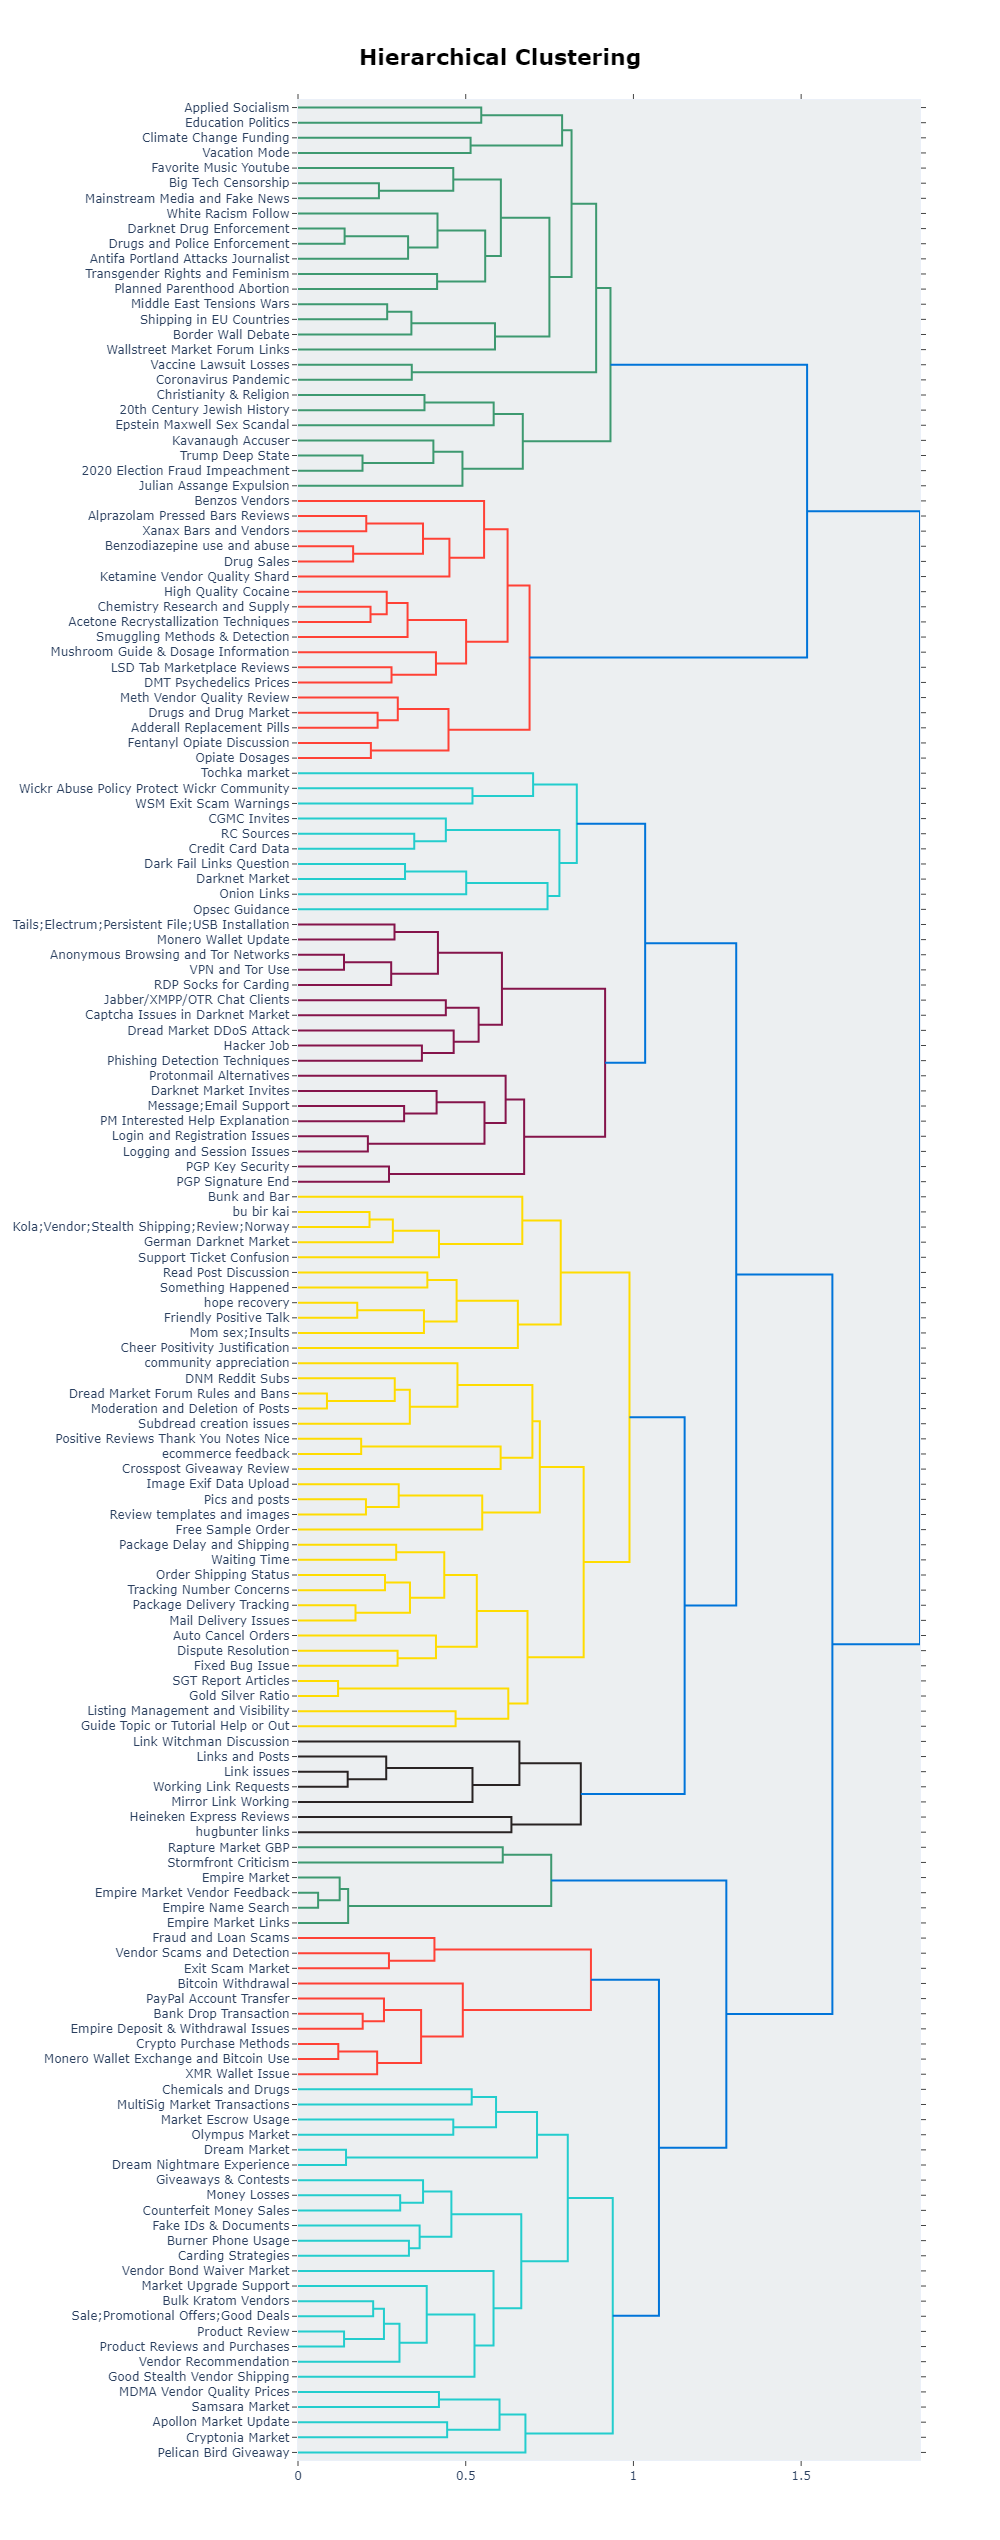

In [27]:
merged_model_content_white_nations.visualize_heatmap(custom_labels=True)

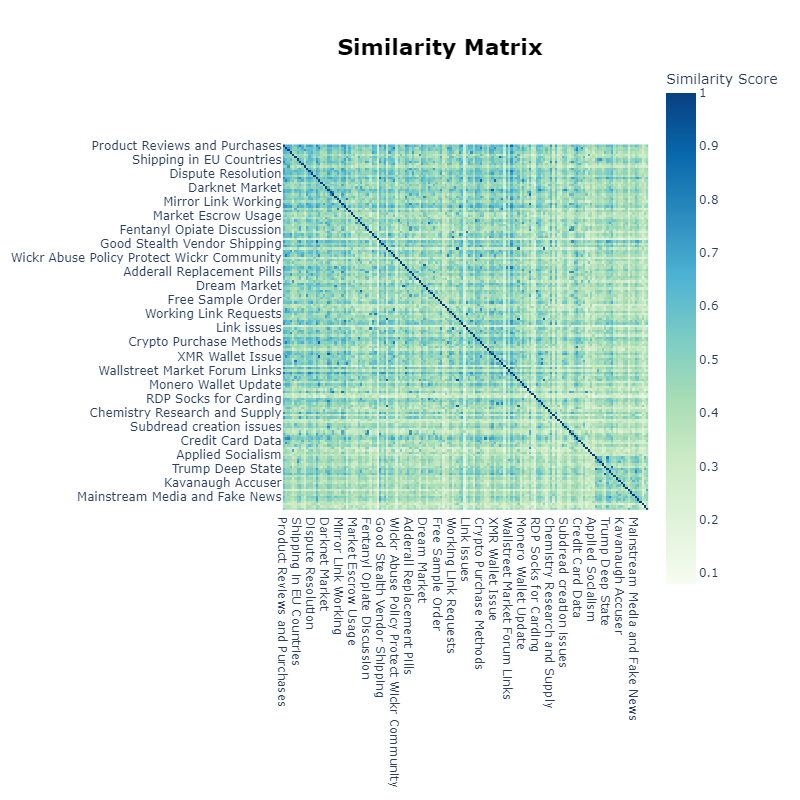

In [30]:
merged_model_content_white_nations.visualize_topics()

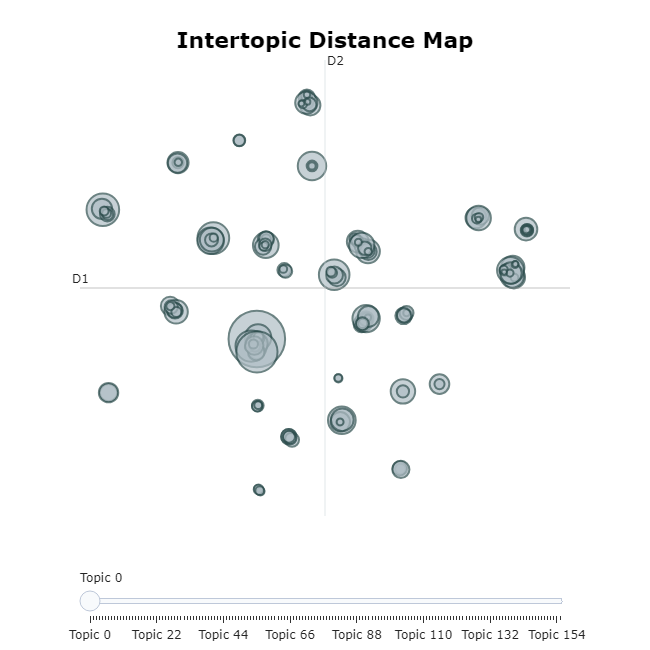

In [31]:
merged_model_content_white_nations.visualize_barchart(top_n_topics=160, custom_labels=True, n_words=10, width=350, height=350)

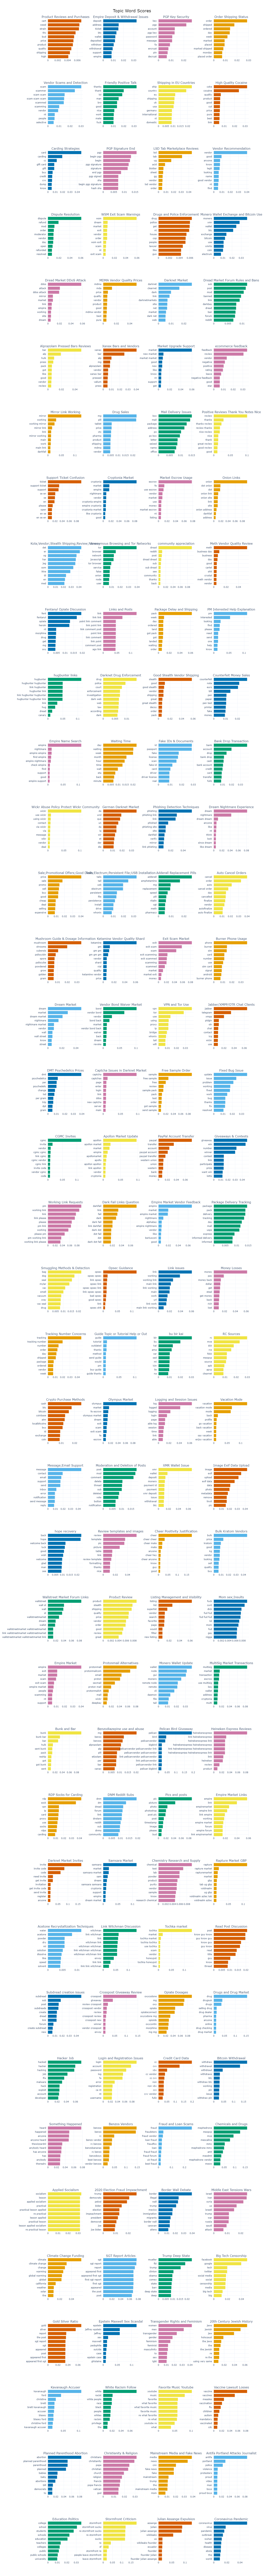

In [36]:
merged_model_content_white_nations.save("Merged_Models_White_Nations_safetensors", serialization="safetensors", save_embedding_model='all-MiniLM-L6-v2')

In [33]:
merged_model_content_white_nations.save("Merged_Models_White_Nations", save_embedding_model='all-MiniLM-L6-v2')

2024-08-04 11:23:30,681 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


# Predict Models - Usage

In [37]:
topic_model = BERTopic.load("Merged_Models_White_Nations", embedding_model='all-MiniLM-L12-v2')

In [38]:
sentence = ['recently closed Samsara market']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]
2024-08-04 11:26:48,119 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                                   Name      CustomName  \
0    113    290  113_samsara_market_samsara market_sam  Samsara Market   

                                      Representation  Representative_Docs  
0  [samsara, market, samsara market, sam, dream, ...                  NaN

In [39]:
sentence = ['i want to buy milk and coffee']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]
2024-08-04 11:26:51,269 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                       Name           CustomName  \
0     95    675  95_bulk_price_kratom_good  Bulk Kratom Vendors   

                                      Representation  Representative_Docs  
0  [bulk, price, kratom, good, kg, vendor, lookin...                  NaN

In [40]:
sentence = ['where i can found some keys account?']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]
2024-08-04 11:26:53,509 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                       Name        CustomName  \
0      2   6350  2_key_pgp_account_pgp key  PGP Key Security   

                                      Representation  Representative_Docs  
0  [key, pgp, account, pgp key, password, message...                  NaN

In [41]:
sentence = ['atk hack']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 19.99it/s]
2024-08-04 11:26:56,964 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                          Name  CustomName  \
0    124    471  31_hacked_hacker_hacking_job  Hacker Job   

                                      Representation  Representative_Docs  
0  [hacked, hacker, hacking, job, lfw, malware, h...                  NaN

In [42]:
sentence = ['White Cut']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 19.58it/s]
2024-08-04 11:26:59,264 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                               Name           CustomName  \
0    145    571  18_white_racist_white people_race  White Racism Follow   

                                      Representation  Representative_Docs  
0  [white, racist, white people, race, black, peo...                  NaN

In [43]:
sentence = ['tobacco shop']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]
2024-08-04 11:27:02,389 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                   Name                     CustomName  \
0     76    542  76_bag_dog_seal_mylar  Smuggling Methods & Detection   

                                      Representation  Representative_Docs  
0  [bag, dog, seal, mylar, vac, smell, vacuum, xr...                  NaN

In [44]:
sentence = ['kush $2']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 18.29it/s]
2024-08-04 11:27:05,324 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                    Name                     CustomName  \
0      0  19104  0_cart_weed_strain_thc  Product Reviews and Purchases   

                                      Representation  Representative_Docs  
0  [cart, weed, strain, thc, bud, price, product,...                  NaN

In [45]:
sentence = ['berlusconi']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]
2024-08-04 11:27:07,419 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                            Name                    CustomName  \
0    105   2750  105_mg_benzo_benzos_alprazolam  Benzodiazepine use and abuse   

                                      Representation  Representative_Docs  
0  [mg, benzo, benzos, alprazolam, alp, pill, eti...                  NaN

In [46]:
sentence = ['ids']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
2024-08-04 11:27:09,499 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                         Name            CustomName  \
0     46   1623  46_id_passport_fake_license  Fake IDs & Documents   

                                      Representation  Representative_Docs  
0  [id, passport, fake, license, scan, fake id, c...                  NaN

In [48]:
sentence = ['vaccine']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:00<00:00, 19.93it/s]
2024-08-04 11:27:25,889 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                                     Name  \
0    147    400  20_vaccine_vaccines_measles_vaccination   

               CustomName                                     Representation  \
0  Vaccine Lawsuit Losses  [vaccine, vaccines, measles, vaccination, flu,...   

   Representative_Docs  
0                  NaN

In [49]:
sentence = ['flight to Colombia to buy some stuff']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]
2024-08-04 11:27:29,909 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                               Name                 CustomName  \
0     75   3821  75_package_pack_delivery_tracking  Package Delivery Tracking   

                                      Representation  Representative_Docs  
0  [package, pack, delivery, tracking, day, mail,...                  NaN

In [50]:
sentence = ['Afghanistan heroin']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 22.32it/s]
2024-08-04 11:27:32,749 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                            Name                  CustomName  \
0     36   2294  36_fent_fentanyl_opiate_heroin  Fentanyl Opiate Discussion   

                                      Representation  Representative_Docs  
0  [fent, fentanyl, opiate, heroin, nt, morphine,...                  NaN

In [51]:
sentence = ['Police']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]
2024-08-04 11:27:43,584 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                              Name                CustomName  \
0     41    849  41_drug_police_court_enforcement  Darknet Drug Enforcement   

                                      Representation  Representative_Docs  
0  [drug, police, court, enforcement, investigati...                  NaN

In [52]:
sentence = ['Trump']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 21.17it/s]
2024-08-04 11:27:56,764 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                            Name  \
0    133   2606  1_trump_democrats_pelosi_biden   

                        CustomName  \
0  2020 Election Fraud Impeachment   

                                      Representation  Representative_Docs  
0  [trump, democrats, pelosi, biden, election, im...                  NaN

In [53]:
sentence = ['Climate']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 17.38it/s]
2024-08-04 11:28:08,174 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                                     Name  \
0    136    915  6_climate_climate change_change_warming   

               CustomName                                     Representation  \
0  Climate Change Funding  [climate, climate change, change, warming, glo...   

   Representative_Docs  
0                  NaN

In [54]:
sentence = ['Debate']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 14.29it/s]
2024-08-04 11:55:42,084 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                         Name          CustomName  \
0     12   2863  12_dispute_refund_mod_order  Dispute Resolution   

                                      Representation  Representative_Docs  
0  [dispute, refund, mod, order, moderator, vendo...                  NaN

In [56]:
sentence = ['Mexican wall']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
2024-08-04 11:56:04,119 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                         Name          CustomName  \
0    134   1802  2_border_illegal_wall_trump  Border Wall Debate   

                                      Representation  Representative_Docs  
0  [border, illegal, wall, trump, mexico, immigra...                  NaN

In [57]:
sentence = ['guns drug and police']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
2024-08-04 11:57:23,702 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                              Name                CustomName  \
0     41    849  41_drug_police_court_enforcement  Darknet Drug Enforcement   

                                      Representation  Representative_Docs  
0  [drug, police, court, enforcement, investigati...                  NaN

In [61]:
sentence = ['guns and police']
results, _ = topic_model.transform(sentence)
topic_model.get_topic_info(results[0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:00<00:00, 18.08it/s]
2024-08-04 11:58:07,344 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                   Name                    CustomName  \
0     14   3042  14_drug_police_get_nt  Drugs and Police Enforcement   

                                      Representation  Representative_Docs  
0  [drug, police, get, nt, house, cop, people, la...                  NaN

# HuggingFace

In [ ]:
topic_model.push_to_hf_hub(
    repo_id="D0men1c0/ISSR_Dark_Web_Merged_Models_Content_White_Nations",
    save_embedding_model='all-MiniLM-L6-v2',
)

In [63]:
topic_model = BERTopic.load("D0men1c0/ISSR_Dark_Web_Merged_Models_Content_White_Nations", embedding_model='all-MiniLM-L6-v2')

In [64]:
sentence = ['recently closed Samsara market']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]
2024-08-04 11:59:20,669 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


Topic  Count                                   Name      CustomName  \
0    113    290  113_samsara_market_samsara market_sam  Samsara Market   

                                      Representation  Representative_Docs  
0  [samsara, market, samsara market, sam, dream, ...                  NaN